<a href="https://colab.research.google.com/github/anitakumar/ml/blob/main/ANOMALY_DETECTION_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#
from sklearn.neighbors import NearestNeighbors


In [12]:
from sklearn import datasets

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df = iris_df[['sepal_length','sepal_width']]

KeyError: "None of [Index(['sepal_length', 'sepal_width'], dtype='object')] are in the [columns]"

In [17]:
df = iris_df[['sepal length (cm)','sepal width (cm)']]

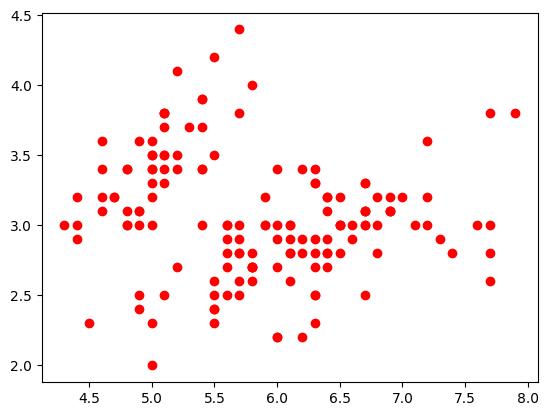

In [18]:
plt.plot(df['sepal length (cm)'],df['sepal width (cm)'], 'ro')
plt.show()

In [20]:
x=df.values

In [21]:
nbrs=NearestNeighbors(n_neighbors=3,algorithm='ball_tree').fit(x)

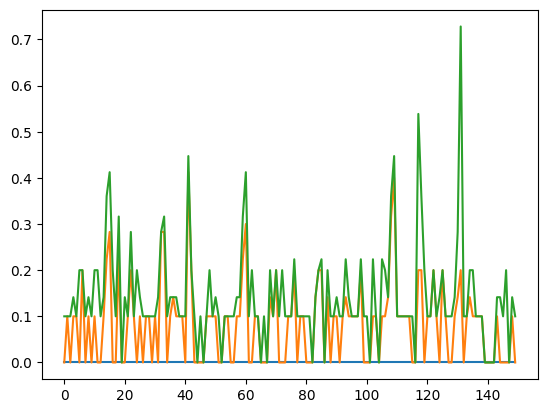

In [22]:
distances,indices=nbrs.kneighbors(x)
plt.plot(distances)
plt.show()

In [25]:
outlier_index=np.where(distances.mean(axis=1)>0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [26]:
outlier_value=df.iloc[outlier_index]
outlier_value

,sepal length (cm),sepal width (cm)
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


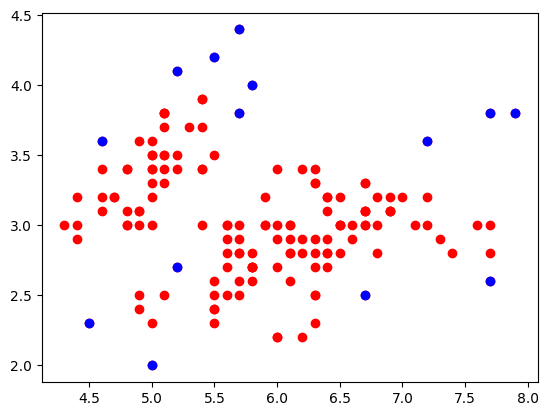

In [27]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='r')
plt.scatter(outlier_value['sepal length (cm)'],outlier_value['sepal width (cm)'],color='b')